# Project description
## The telecom operator Megaline (analyze clients' behavior)

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
<br>You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

# Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

***Surf***
1. Monthly charge: 20 dollars
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
- minute: 3 cents 
- text message: 3 cents
- GB of data: 10 dollars

***Ultimate***
1. Monthly charge: 70 dollars
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: 7 dollars


**The ```users``` table (data on users):**
- ```user_id``` — unique user identifier
- ```first_name``` — user's name
- ```last_name``` — user's last name
- ```age``` — user's age (years)
- ```reg_date``` — subscription date (dd, mm, yy)
- ```churn_date``` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
- ```city``` — user's city of residence
- ```plan``` — calling plan name

**The ```calls``` table (data on calls):**
- ```id``` — unique call identifier
- ```call_date``` — call date
- ```duration``` — call duration (in minutes)
- ```user_id``` — the identifier of the user making the call

**The ```messages``` table (data on texts):**
- ```id``` — unique text message identifier
- ```message_date``` — text message date
- ```user_id``` — the identifier of the user sending the text

**The ```internet``` table (data on web sessions):**
- ```id``` — unique session identifier
- ```mb_used``` — the volume of data spent during the session (in megabytes)
- ```session_date``` — web session date
- ```user_id``` — user identifier

**The ```plans``` table (data on the plans):**
- ```plan_name``` — calling plan name
- ```usd_monthly_fee``` — monthly charge in US dollars
- ```minutes_included``` — monthly minute allowance
- ```messages_included``` — monthly text allowance
- ```mb_per_month_included``` — data volume allowance (in megabytes)
- ```usd_per_minute``` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- ```usd_per_message``` — price per text after exceeding the package limits
- ```usd_per_gb``` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np


In [2]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [9]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Conclusion


5 data frames have been loaded (df_calls, df_internet, df_messages, df_plans, df_users)
- The plans table has 2 rows in 8 columns and there are no missing values and no duplicate rows. The information matches the information given in the program brief.
- Df_users date has missing values in 'churn_date' column.
- Needs to find and fix data error.
- In the future, it is necessary to find and eliminate errors in the data.


## Data preprocessing.

In [13]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
#For further work, we need 'call_date' and 'duration', but because our tariff is paid once a month, we are not 
#interested in the exact date, we are interested in grouping the duration of calls for each client by months.

In [14]:
df_calls['duration'] = np.ceil(df_calls['duration'])
# round up call times up


In [15]:
df_calls['call_date_month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,user_id,call_date,duration,call_date_month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [16]:
df_calls['duration'].describe()

count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [17]:
df_calls.groupby('duration')['user_id'].count()
# There are 26834 zero in the 'duration' column, I assume this is a customer's attempt to call, but 
#the other person did not pick up the phone. Since Megaline rounds everything up, I replaced 0 with 1.

duration
0.0     26834
1.0      5795
2.0      6446
3.0      6942
4.0      7434
5.0      7778
6.0      7848
7.0      7769
8.0      7718
9.0      7357
10.0     6918
11.0     6407
12.0     5750
13.0     5070
14.0     4402
15.0     3889
16.0     3011
17.0     2461
18.0     1992
19.0     1604
20.0     1243
21.0      910
22.0      671
23.0      461
24.0      324
25.0      235
26.0      157
27.0      118
28.0       62
29.0       58
30.0       27
31.0       18
32.0       13
33.0        6
34.0        2
36.0        3
37.0        1
38.0        1
Name: user_id, dtype: int64

In [18]:
df_calls['duration'] = df_calls['duration'].replace(0,1)

In [19]:
df_calls['duration'].describe()

count    137735.000000
mean          7.341496
std           5.728989
min           1.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [20]:
df_calls_grouped = df_calls.groupby(by = ['user_id', 'call_date_month'])['duration'].agg(['count','sum'])
df_calls_grouped.head()
# Grouped table by all users and months showing how many calls were made each month and how many minutes
#they spent in total per month

count    sum
user_id call_date_month              
1000    12                  16  124.0
1001    8                   27  187.0
        9                   49  326.0
        10                  65  411.0
        11                  64  441.0

In [21]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [22]:
df_internet['session_date_month'] = df_internet['session_date'].dt.month
df_internet.head()

,id,user_id,session_date,mb_used,session_date_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [23]:
df_internet['gb_used'] = df_internet['mb_used']/1024
df_internet.head()

,id,user_id,session_date,mb_used,session_date_month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


In [24]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
df_internet.head()

,id,user_id,session_date,mb_used,session_date_month,gb_used
0,1000_13,1000,2018-12-29,90.0,12,0.087754
1,1000_204,1000,2018-12-31,0.0,12,0.000000
2,1000_379,1000,2018-12-28,661.0,12,0.644922
3,1000_413,1000,2018-12-26,271.0,12,0.264639
4,1000_442,1000,2018-12-27,881.0,12,0.859590


In [25]:
df_internet_grouped = df_internet.groupby(by = ['user_id', 'session_date_month'])['gb_used'].sum()
df_internet_grouped.head()
#Grouped data by user and month.

user_id  session_date_month
1000     12                     1.856904
1001     8                      6.756982
         9                     13.002754
         10                    21.807119
         11                    18.070605
Name: gb_used, dtype: float64

In [26]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

In [27]:
df_messages['message_date_month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,user_id,message_date,message_date_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [28]:
df_messages_grouped = df_messages.groupby(by = ['user_id', 'message_date_month'])['id'].count()
df_messages_grouped

user_id  message_date_month
1000     12                    11
1001     8                     30
         9                     44
         10                    53
         11                    36
                               ..
1496     9                     21
         10                    18
         11                    13
         12                    11
1497     12                    50
Name: id, Length: 1806, dtype: int64

In [29]:
df_users['churn_date'].describe()

count             34
unique            29
top       2018-12-18
freq               3
Name: churn_date, dtype: object

In [30]:
df_users['churn_date'].isna().sum()

466

In [31]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [32]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

In [33]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

In [34]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Conclusion


- With the date df_calls, work was done to round up minutes to whole numbers, and a separate column called call_date_month was created.
- In the 'duration' column of 26834 zeros, 0 have been replaced with 1.
- A table was created for all clients by how many minutes they spent talking per month.
- With the df_internet date, work was done to round the megabytes to integers, and a separate column named session_date_month was created.
- Grouped data by user and month.
- The date is df_messages and a separate column named message_date_month was created and the data was grouped.
- No changes have been made to the df_plans date.


In [35]:
df_messages_grouped = df_messages_grouped.reset_index()
df_messages_grouped.head()

,user_id,message_date_month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [36]:
df_messages_grouped.columns = ['user_id', 'message_date_month', 'message_count']

In [37]:
total_data = pd.merge(df_users, df_messages_grouped, how='outer', left_on = 'user_id', right_on = 'user_id')
total_data.head()
#At the beginning, users and messages were added to the table.

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,message_date_month,message_count
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0


In [38]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 0 to 1903
Data columns (total 10 columns):
user_id               1904 non-null int64
first_name            1904 non-null object
last_name             1904 non-null object
age                   1904 non-null int64
city                  1904 non-null object
reg_date              1904 non-null datetime64[ns]
plan                  1904 non-null object
churn_date            128 non-null datetime64[ns]
message_date_month    1806 non-null float64
message_count         1806 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 163.6+ KB


In [39]:
df_calls_grouped

count    sum
user_id call_date_month              
1000    12                  16  124.0
1001    8                   27  187.0
        9                   49  326.0
        10                  65  411.0
        11                  64  441.0
...                        ...    ...
1498    12                  39  346.0
1499    9                   41  352.0
        10                  53  397.0
        11                  45  314.0
        12                  65  505.0

[2258 rows x 2 columns]

In [40]:
total_data = pd.merge(total_data, df_calls_grouped, how='outer', left_on = ['user_id', 'message_date_month'], right_on = ['user_id', 'call_date_month'])
total_data.head(20)
#Joined this date with df_calls_grouped.

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,message_date_month,message_count,count,sum
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0,16.0,124.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0,27.0,187.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0,49.0,326.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0,65.0,411.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0,64.0,441.0
5,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,12.0,44.0,56.0,422.0
6,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10.0,15.0,11.0,62.0
7,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,11.0,32.0,55.0,393.0
8,1002,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,12.0,41.0,47.0,393.0
9,1003,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28,surf,NaT,12.0,50.0,149.0,1135.0


In [41]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 0 to 2388
Data columns (total 12 columns):
user_id               2389 non-null int64
first_name            1904 non-null object
last_name             1904 non-null object
age                   1904 non-null float64
city                  1904 non-null object
reg_date              1904 non-null datetime64[ns]
plan                  1904 non-null object
churn_date            128 non-null datetime64[ns]
message_date_month    1806 non-null float64
message_count         1806 non-null float64
count                 2258 non-null float64
sum                   2258 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 242.6+ KB


In [42]:
total_data.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'message_date_month', 'message_count', 'count', 'sum'],
      dtype='object')

In [43]:
total_data.columns = ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 
                      'plan', 'churn_date','month', 'message_count','number_of_calls', 'call_duration']

In [44]:
total_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,message_count,number_of_calls,call_duration
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0,16.0,124.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0,27.0,187.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0,49.0,326.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0,65.0,411.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0,64.0,441.0


In [45]:
df_internet_grouped = df_internet_grouped.reset_index()
df_internet_grouped.head()

,user_id,session_date_month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605


In [46]:
total_data = pd.merge(total_data, df_internet_grouped, how='outer', left_on = ['user_id', 'month'], right_on = ['user_id', 'session_date_month'])
total_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,message_count,number_of_calls,call_duration,session_date_month,gb_used
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0,16.0,124.0,12.0,1.856904
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0,27.0,187.0,8.0,6.756982
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0,49.0,326.0,9.0,13.002754
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0,65.0,411.0,10.0,21.807119
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0,64.0,441.0,11.0,18.070605


In [47]:
total_data.drop(['session_date_month'], axis='columns', inplace=True)
total_data.head()
#The 'session_date_month' and 'month' columns are identical. 'Session_date_monthу' has been removed.

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,message_count,number_of_calls,call_duration,gb_used
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0,16.0,124.0,1.856904
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0,27.0,187.0,6.756982
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0,49.0,326.0,13.002754
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0,65.0,411.0,21.807119
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0,64.0,441.0,18.070605


In [48]:
total_data = pd.merge(total_data, df_plans, how='left', left_on = 'plan', right_on = 'plan_name')
total_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,message_count,...,call_duration,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0,...,124.0,1.856904,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0,...,187.0,6.756982,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0,...,326.0,13.002754,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0,...,411.0,21.807119,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0,...,441.0,18.070605,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf


In [49]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 21 columns):
user_id                  2875 non-null int64
first_name               1904 non-null object
last_name                1904 non-null object
age                      1904 non-null float64
city                     1904 non-null object
reg_date                 1904 non-null datetime64[ns]
plan                     1904 non-null object
churn_date               128 non-null datetime64[ns]
month                    1806 non-null float64
message_count            1806 non-null float64
number_of_calls          2258 non-null float64
call_duration            2258 non-null float64
gb_used                  2277 non-null float64
messages_included        1904 non-null float64
mb_per_month_included    1904 non-null float64
minutes_included         1904 non-null float64
usd_monthly_pay          1904 non-null float64
usd_per_gb               1904 non-null float64
usd_per_message          1904 non-null f

### Conclusion


The total_data was created and we will combine all the data necessary for analysis in it.
- Calculated the number of calls made and spent minutes of conversation by months;
- The number of sent messages by month has been counted;
- Calculated the amount of consumed Internet traffic by months.


In [50]:
total_data['calls_over_plan'] = total_data['call_duration'] - total_data['minutes_included']
total_data['messages_over_plan'] = total_data['message_count'] - total_data['messages_included']
total_data['internet_gb_over_plan'] = total_data['gb_used'] - (total_data['mb_per_month_included']/1024)

pd.set_option('display.max_columns', None)
total_data.head()
# Calculation of monthly revenue from each user.

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,message_count,number_of_calls,call_duration,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,calls_over_plan,messages_over_plan,internet_gb_over_plan
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0,16.0,124.0,1.856904,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,-2876.0,-989.0,-28.143096
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0,27.0,187.0,6.756982,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-313.0,-20.0,-8.243018
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0,49.0,326.0,13.002754,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-174.0,-6.0,-1.997246
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0,65.0,411.0,21.807119,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-89.0,3.0,6.807119
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0,64.0,441.0,18.070605,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-59.0,-14.0,3.070605


In [51]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 24 columns):
user_id                  2875 non-null int64
first_name               1904 non-null object
last_name                1904 non-null object
age                      1904 non-null float64
city                     1904 non-null object
reg_date                 1904 non-null datetime64[ns]
plan                     1904 non-null object
churn_date               128 non-null datetime64[ns]
month                    1806 non-null float64
message_count            1806 non-null float64
number_of_calls          2258 non-null float64
call_duration            2258 non-null float64
gb_used                  2277 non-null float64
messages_included        1904 non-null float64
mb_per_month_included    1904 non-null float64
minutes_included         1904 non-null float64
usd_monthly_pay          1904 non-null float64
usd_per_gb               1904 non-null float64
usd_per_message          1904 non-null f

In [52]:
def monthly_revenue(row):
    revenue = 0
    if row['calls_over_plan']>0:
        revenue = (abs(row['calls_over_plan']))*row['usd_per_minute']
    if row['messages_over_plan']>0:
        revenue += (abs(row['messages_over_plan']))*row['usd_per_message'] 
    if row['internet_gb_over_plan']>0:
        revenue += (abs(row['internet_gb_over_plan']))*row['usd_per_gb']
    return revenue + row['usd_monthly_pay']

total_data['revenue'] = total_data.apply(monthly_revenue, axis = 1)
total_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,message_count,number_of_calls,call_duration,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,calls_over_plan,messages_over_plan,internet_gb_over_plan,revenue
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,11.0,16.0,124.0,1.856904,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,-2876.0,-989.0,-28.143096,70.000000
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,30.0,27.0,187.0,6.756982,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-313.0,-20.0,-8.243018,20.000000
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,44.0,49.0,326.0,13.002754,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-174.0,-6.0,-1.997246,20.000000
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,53.0,65.0,411.0,21.807119,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-89.0,3.0,6.807119,88.161191
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,36.0,64.0,441.0,18.070605,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,-59.0,-14.0,3.070605,50.706055


In [53]:
total_data.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'month', 'message_count', 'number_of_calls',
       'call_duration', 'gb_used', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'calls_over_plan', 'messages_over_plan', 'internet_gb_over_plan',
       'revenue'],
      dtype='object')

### Conclusion


The monthly revenue from each user was calculated.
All data is stored in total_data for further analysis.

## Analyze the data.

*Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.*

In [54]:
total_data.groupby(by = 'plan')[('message_count','call_duration','gb_used')].agg(['mean','std','var'])

message_count                         call_duration              \
                  mean        std          var          mean         std   
plan                                                                       
surf         40.109656  33.035500  1091.344231    456.520101  241.375275   
ultimate     46.296233  32.942118  1085.183108    454.810017  256.041982   

                          gb_used                       
                   var       mean       std        var  
plan                                                    
surf      58262.023485  16.303317  7.749013  60.047199  
ultimate  65557.496716  16.854433  7.548833  56.984878

In [55]:
print('Surf on average per month:')
print('Minutes: {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'call_duration']).mean()))
print('Texts: {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'message_count']).mean()))
print('Volume of data : {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'gb_used']).mean()))
print()
print('Dispersion of minutes: {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'call_duration']).std()**2))
print('Dispersion of texts: {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'message_count']).std()**2))
print('Dispersion of volume of data : {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'gb_used']).std()**2))
print()
print('Standard deviation of minutes: {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'call_duration']).std()))
print('Standard deviation of texts: {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'message_count']).std()))
print('Standard deviation of volume of data : {:.2f}'.format((total_data.loc[total_data['plan']=='surf', 'gb_used']).std()))

Surf on average per month:
Minutes: 456.52
Texts: 40.11
Volume of data : 16.30

Dispersion of minutes: 58262.02
Dispersion of texts: 1091.34
Dispersion of volume of data : 60.05

Standard deviation of minutes: 241.38
Standard deviation of texts: 33.04
Standard deviation of volume of data : 7.75


In [56]:
print('Ultimate on average per month:')
print('Minutes: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'call_duration']).mean()))
print('Texts: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'message_count']).mean()))
print('Volume of data: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'gb_used']).mean()))
print()
print('Dispersion of minutes: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'call_duration']).std()**2))
print('Dispersion of texts: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'message_count']).std()**2))
print('Dispersion of volume of data: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'gb_used']).std()**2))
print()
print('Standard deviation of minutes: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'call_duration']).std()))
print('Standard deviation of texts: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'message_count']).std()))
print('Standard deviation of volume of data: {:.2f}'.format((total_data.loc[total_data['plan']=='ultimate', 'gb_used']).std()))

Ultimate on average per month:
Minutes: 454.81
Texts: 46.30
Volume of data: 16.85

Dispersion of minutes: 65557.50
Dispersion of texts: 1085.18
Dispersion of volume of data: 56.98

Standard deviation of minutes: 256.04
Standard deviation of texts: 32.94
Standard deviation of volume of data: 7.55


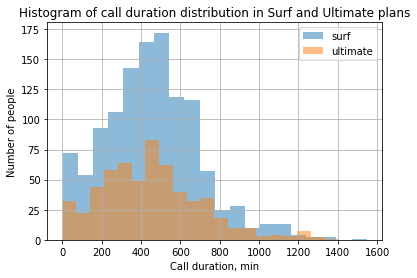

In [57]:
for plan, d in total_data.groupby(by = 'plan'):
    d['call_duration'].hist(bins=20,alpha = 0.5, label=plan)
plt.xlabel('Call duration, min')
plt.ylabel('Number of people')
plt.title('Histogram of call duration distribution in Surf and Ultimate plans')
plt.legend()
plt.show ()
#The distribution is similar to normal, slightly skewed in the positive direction 
#(that is, its right "tail" is longer than the left).

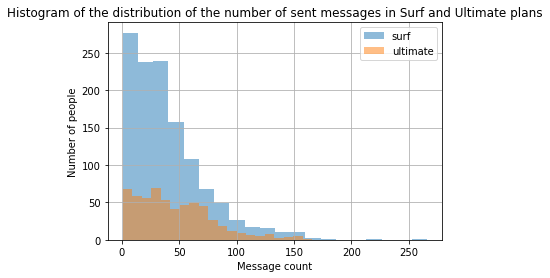

In [58]:
for plan, d in total_data.groupby(by = 'plan'):
    d['message_count'].hist(bins=20,alpha = 0.5, label=plan)
plt.xlabel('Message count')
plt.ylabel('Number of people')
plt.title('Histogram of the distribution of the number of sent messages in Surf and Ultimate plans')
plt.legend()
plt.show ()
#Both distributions are positively skewed, that is the right "tail" of the distributions is much longer than the left.

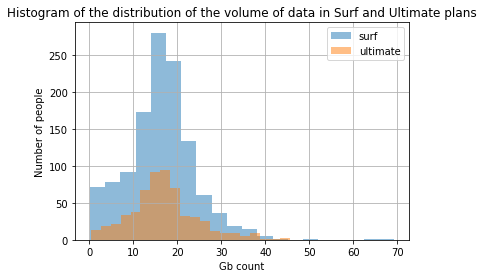

In [59]:
for plan, d in total_data.groupby(by = 'plan'):
    d['gb_used'].hist(bins=20,alpha = 0.5, label=plan)
plt.xlabel('Gb count')
plt.ylabel('Number of people')
plt.title('Histogram of the distribution of the volume of data in Surf and Ultimate plans')
plt.legend()
plt.show()
#The distribution is similar to normal, slightly skewed in the positive direction 
#(that is, its right "tail" is longer than the left).

In [60]:
print('Percentage of Surf plan users who use more call minutes than provided in the plan: {:.2%}'.format((total_data.loc[total_data['plan']=='surf', 'call_duration']>500).mean()))
print('Percentage of Ultimate plan users who use more call minutes than provided in the plan: {:.2%}'.format((total_data.loc[total_data['plan']=='ultimate', 'call_duration']>3000).mean()))


Percentage of Surf plan users who use more call minutes than provided in the plan: 37.10%
Percentage of Ultimate plan users who use more call minutes than provided in the plan: 0.00%


In [61]:
print('Percentage of Surf plan users who use more texts than provided in the plan: {:.2%}'.format((total_data.loc[total_data['plan']=='surf', 'message_count']>50).mean()))
print('Percentage of Ultimate plan users who use more texts than provided in the plan: {:.2%}'.format((total_data.loc[total_data['plan']=='ultimate', 'message_count']>1000).mean()))


Percentage of Surf plan users who use more texts than provided in the plan: 26.34%
Percentage of Ultimate plan users who use more texts than provided in the plan: 0.00%


In [62]:
print('Percentage of Surf plan users who use more GB than provided in the plan: {:.2%}'.format((total_data.loc[total_data['plan']=='surf', 'gb_used']>15).mean()))
print('Percentage of Ultimate plan users who use more GB than provided in the plan: {:.2%}'.format((total_data.loc[total_data['plan']=='ultimate', 'gb_used']>30).mean()))


Percentage of Surf plan users who use more GB than provided in the plan: 55.07%
Percentage of Ultimate plan users who use more GB than provided in the plan: 5.55%


### Conclusion


- The percentage of Surf plan users who are not satisfied with 500 minutes per month is 37.10%. Ultimate customers have 3,000 minutes per month and do not exceed this threshold.
- The percentage of Surf plan users who don't get enough of 50 messages a month is 26.34%, which is just over a quarter of all users. Ultimate customers only need 1000 messages per month and do not exceed this threshold.
- The percentage of Surf plan users who do not have enough 15 GB per month is 55.07%, which is more than half of the users. The percentage of Ultimate plan customers who do not have enough 30 GB is 5.55%.

From these data, it can be seen that a large number of Surf tariff customers lack services in their tariffs and they exceed the number of minutes, messages and GB. Thus, on Surf clients, the Megaline operator earns a lot for additional services.
Ultimate customers are mostly satisfied with their data plan, only 5.55% use more than 30 GB per month.


## Test the hypotheses.

**The average revenue from users of Ultimate and Surf calling plans differs.**

**Null Hypothesis:** 
The average revenue from users of Ultimate and Surf plans are equal.

**Alternative hypothesis:**
The average revenue from users of Ultimate and Surf plans are **not** equal.

In [63]:
data1 = total_data.loc[total_data['plan']=='surf', 'revenue']
data2 = total_data.loc[total_data['plan']=='ultimate', 'revenue']
alpha = 0.05

results = st.ttest_ind(
    data1,
    data2,
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 8.549161757997579e-25
We reject the null hypothesis


### Conclusion


The null hypothesis states that there is no difference between the average income from users of the Ultimate and Surf Call plans. The significance level is 0.05. Since the p-value is less than 0.05, this means that the groups are different, so the null hypothesis is rejected.
The analysis shows that the average revenue from users of Ultimate and Surf plans is different.

**The average revenue from users in NY-NJ area is different from that of the users from other regions.**

**Null Hypothesis:** 
The average revenue from users in NY-NJ area is same from that of the users from other regions.

**Alternative hypothesis:**
The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [64]:
data3 = total_data.loc[total_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'revenue']
data4 = total_data.loc[total_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'revenue']
alpha = 0.05

results = st.ttest_ind(
    data3,
    data4,
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: nan
We can't reject the null hypothesis


In [65]:
ny_nj = total_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] 
# revenue of users in NY-NJ
not_ny_nj = total_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
# revenue of users not in NY-NJ
print('The average revenue of users in NY-NJ  area is ${:.2f}'.format(ny_nj.mean()))
print('The average revenue of users from other regions is ${:.2f}'.format(not_ny_nj.mean()))

The average revenue of users in NY-NJ  area is $55.67
The average revenue of users from other regions is $62.03


### Conclusion


The null hypothesis states that there is no difference between the average income from users in the New York-New Jersey area and users from other regions. Significance level 0.05. Since the p-value is less than 0.05, this means that the groups are different, so the null hypothesis is rejected.
Calculations show that the average revenue of users in New York-New Jersey area is 55.78 dollars and the average revenue of users from other regions is 62.13 dollars.

## Write an overall conclusion.

### Conclusion


In this work, two plans of the Megaline operator were considered: "Surf" and "Ultimate".
The goal was to understand which plan brings more money to the operator in order to adjust the advertising budget based on this. The analysis was carried out using data from 500 Megaline users for 2018.
In the first and second paragraphs, general information about the data was studied, errors were processed, all data were combined into one date.
Monthly is calculated for each user:
- the number of calls,
- the number of minutes,
- the number of sent,
- volume of data,
- revenue from each user.

Further, the analysis of the data was carried out and a conclusion was made. A large number of Surf plan customers are over the plan limits. Clients of the Ultimate plan only exceed the plan in volume of data. That is, according to the Surf plan, the operator earns quite a lot on additional services (in excess of the plan), and for users of the Ultimate tariff, the main income is the cost of the tariff itself.

In the fourth paragraph, two hypotheses were tested:
- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in NY-NJ area is different from that of the users from other regions.

Finally, can conclude from this analysis that:
- Users on the Ultimate plan has more call duration per month, send more text messages, require more data volume, and brings in more average revenue than users on the Surf plan.
- Surf users often do not have enough call duration, text messages and volume of data, and they use additional services.
- The average revenue from users in other regions is greater than revenue from users in the New York-New Jersey area.
- The Ultimate plan is more profitable than the Surf plan, even though the Surf plan has many users exceeding the plan limits.
